# Importing the libraries and loading the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2024_Accidentalidad.csv', sep=';')

In [4]:
df.sample(5)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
27903,2024S022820,24/07/2024,18:28:00,CALL. JOSE ABASCAL / CALL. FERNANDEZ DE LA HOZ,47,7,CHAMBERÍ,Colisión lateral,Despejado,Turismo,Conductor,De 30 a 34 años,Hombre,14.0,Sin asistencia sanitaria,441088.0,4476633.0,N,NaN
9297,2024S008717,09/03/2024,20:30:00,CALL. MESONERO ROMANOS / CALL. ABADA,2,1,CENTRO,Atropello a persona,Nublado,Todo terreno,Peatón,De 25 a 29 años,Mujer,1.0,Atención en urgencias sin posterior ingreso,440254.0,4474568.0,N,NaN
9952,2024S009220,14/03/2024,18:00:00,"PASEO. SANTA MARIA DE LA CABEZA, 1",1,2,ARGANZUELA,Colisión lateral,NaN,Turismo,Pasajero,De 30 a 34 años,Mujer,NaN,NaN,441129.0,4473160.0,N,NaN
15913,2024S014950,28/04/2024,13:30:00,CALL. ALFONSO XII / CALL. FELIPE IV,30,3,RETIRO,Colisión lateral,Despejado,Turismo,Conductor,De 60 a 64 años,Hombre,14.0,Sin asistencia sanitaria,441547.0,4474086.0,N,NaN
19423,2024S017572,24/05/2024,13:02:00,"CALL. MARIA DE MOLINA, 30",30,4,SALAMANCA,Alcance,Despejado,Motocicleta hasta 125cc,Conductor,De 50 a 54 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,441916.0,4476568.0,N,NaN


In [5]:
df.shape

(40165, 19)

# Tarea 1
*Realiza un análisis descriptivo del dataset. Analiza la distribución de los datos
por cada una de las columnas, realiza los pasos de pre-procesamiento necesarios,
justificando adecuadamente las acciones tomadas. Se deberá hacer uso de gráficas para
entender los datos y las decisiones adoptadas.*

## 0. Analysis

In [6]:
df.dtypes

num_expediente           object
fecha                    object
hora                     object
localizacion             object
numero                   object
cod_distrito              int64
distrito                 object
tipo_accidente           object
estado_meteorológico     object
tipo_vehiculo            object
tipo_persona             object
rango_edad               object
sexo                     object
cod_lesividad           float64
lesividad                object
coordenada_x_utm        float64
coordenada_y_utm        float64
positiva_alcohol         object
positiva_droga          float64
dtype: object

#### Distribution of number of people involved in the accidents

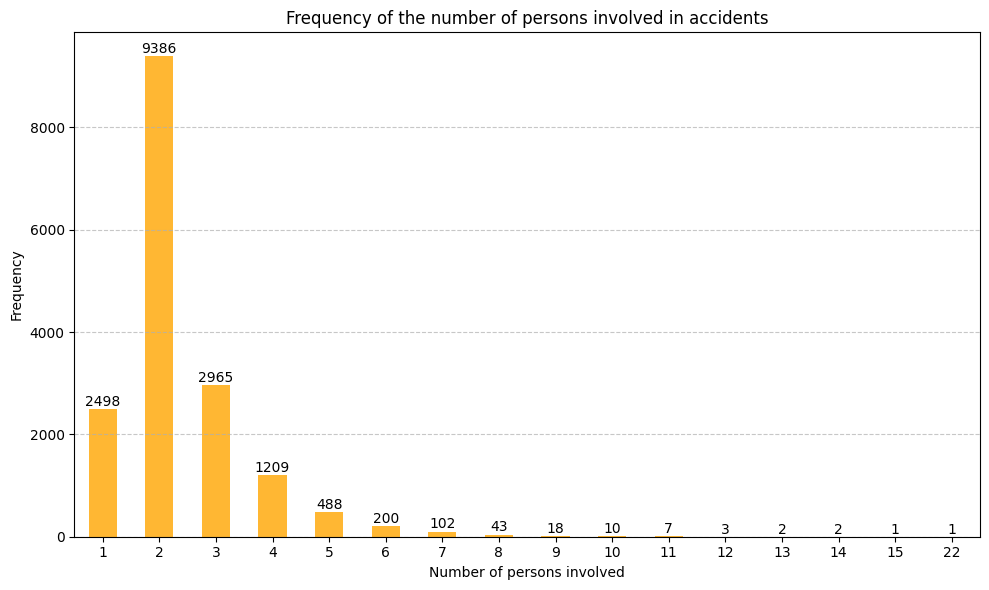

In [7]:
num_persons_per_accident = df.groupby('num_expediente').size()
frecuency = num_persons_per_accident.value_counts().sort_index()

plt.figure(figsize=(10, 6))
bars = frecuency.plot(kind='bar', color='orange', alpha=0.8)

plt.title('Frequency of the number of persons involved in accidents')
plt.xlabel('Number of persons involved')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for index, value in enumerate(frecuency):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


#### Distribution of categorical variables

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def categorical_plot(column, rotation = 0):
    # Include NaN as an additional category
    count = df[column].value_counts(dropna=False)
    count.index = count.index.fillna('NaN')
    # Plot
    ax = count.plot(kind='bar', figsize=(10, 6), color='skyblue')
    plt.title(f'Distribution of accidents by {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Añadir el sumatorio encima de cada barra
    for i, value in enumerate(count):
        plt.text(i, value + 10, str(value), ha='center', va='bottom', fontsize=9, rotation=rotation)
    
    plt.show()

def pie_categorical(column):
    # Include NaN as an additional category
    count = df[column].value_counts(dropna=False)
    count.index = count.index.fillna('NaN')
    # Plot
    count.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
    plt.title(f'Percentage distribution by {column}')
    plt.ylabel('')
    plt.show()

##### Rango de edad

##### Positivo drogas

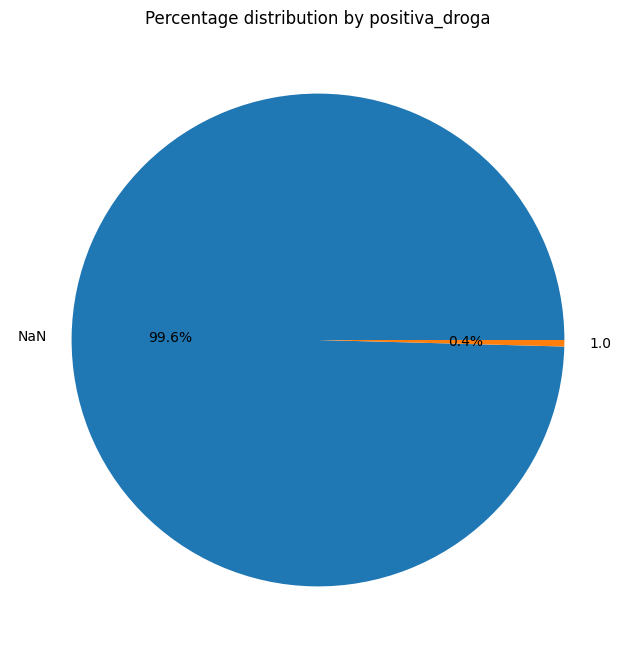

In [9]:
pie_categorical('positiva_droga')


## 1. Preprocess

### 1.1. NaN

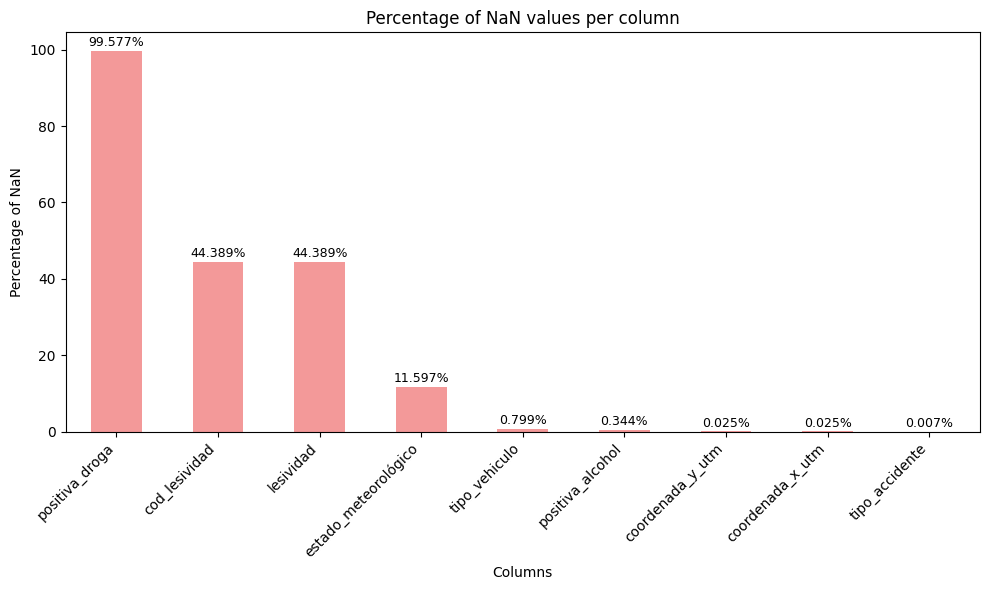

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


# Calcular porcentajes de NaN por columna
nan_percentages = (df.isna().sum() / len(df)) * 100
nan_percentages = nan_percentages[nan_percentages > 0]  # Filtrar columnas con NaN
nan_percentages = nan_percentages.sort_values(ascending=False)  # Ordenar

# Crear la gráfica
plt.figure(figsize=(10, 6))
bars = nan_percentages.plot(kind='bar', color='lightcoral', alpha=0.8)
plt.title('Percentage of NaN values per column')
plt.xlabel('Columns')
plt.ylabel('Percentage of NaN')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Añadir los valores encima de las barras
for bar, percentage in zip(bars.patches, nan_percentages):
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Posición horizontal
        bar.get_height() + 0.5,  # Posición vertical
        f'{percentage:.3f}%',  # Texto con 3 decimales
        ha='center',  # Centrado horizontal
        va='bottom',  # Centrado vertical
        fontsize=9, color='black'
    )

plt.show()


In [11]:
def null_percentage(df, percentage):
    null_ratio = {}
    for col in df.columns:
        ratio = df[col].isna().sum() / len(df) * 100
        if ratio > percentage:
            null_ratio[col] = ratio
           
    return null_ratio

In [12]:
null_percentage(df, 0)

{'tipo_accidente': np.float64(0.007469189592929167),
 'estado_meteorológico': np.float64(11.597161707954687),
 'tipo_vehiculo': np.float64(0.799203286443421),
 'cod_lesividad': np.float64(44.38939375077804),
 'lesividad': np.float64(44.38939375077804),
 'coordenada_x_utm': np.float64(0.024897298643097227),
 'coordenada_y_utm': np.float64(0.024897298643097227),
 'positiva_alcohol': np.float64(0.34358272127474165),
 'positiva_droga': np.float64(99.57674592306735)}

According to Adrian: 
- everything that is lower than 10 -> we drop the rows
- estado meteorológico -> try to inpute the data

accidente, coordenadas,  -> eliminar filas
tipo vehiculo -> cambiar NaN por 'Sin especificar'
estado mete -> input

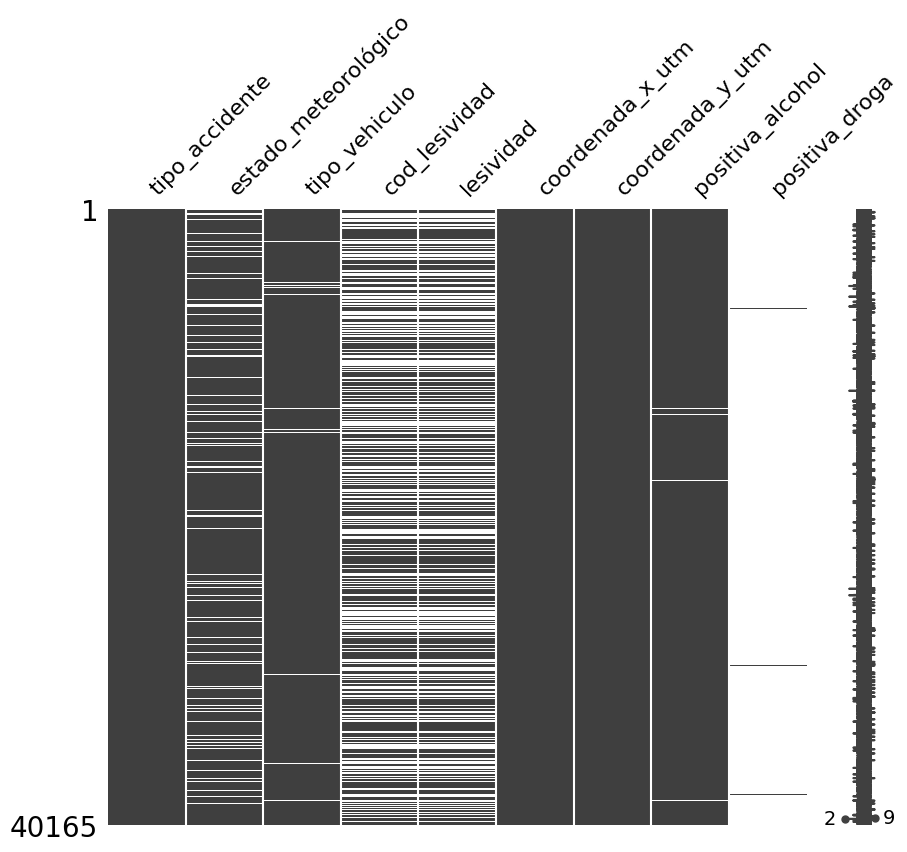

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

col = ['tipo_accidente','estado_meteorológico', 'tipo_vehiculo', 'cod_lesividad', 'lesividad', 'coordenada_x_utm', 'coordenada_y_utm' , 'positiva_alcohol', 'positiva_droga']
nf_df = df[col]
msno.matrix(nf_df, figsize=(10, 8))
plt.show()

#### 1.1.1. Cooridinates

As coordinates and adress give the same information, we decided that it makes more sense to only keep the coordinates, because they are more specific, preserve the information about the distance and are numeric values.

We will drop *localizacion* and *numero* columns. We decided to keep the *distrito* column, as it gives more iformation than just an adress.

We can see that the percentage of NaNs is excacly the same for *x* and *y* coordinates. Anyway, we will check if it is always true that lack of one of the coordinates implies the lack of the other.

In [14]:
df[(df['coordenada_x_utm'].isna() == True) & (df['coordenada_y_utm'].isna() == True)]

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
34485,2024S026886,24/09/2024,2:05:00,PASEO. CASTELLANA / CALL. HERMANOS PINZON,124,5,CHAMARTÍN,Alcance,Despejado,Turismo,Conductor,De 35 a 39 años,Hombre,14.0,Sin asistencia sanitaria,NaN,NaN,N,NaN
34486,2024S026886,24/09/2024,2:05:00,PASEO. CASTELLANA / CALL. HERMANOS PINZON,124,5,CHAMARTÍN,Alcance,Despejado,Turismo,Pasajero,De 40 a 44 años,Mujer,6.0,Asistencia sanitaria inmediata en centro de sa...,NaN,NaN,N,NaN
39263,2024S029749,25/10/2024,23:30:00,"PASEO. RECOLETOS, 21",21,1,CENTRO,Caída,Despejado,VMU eléctrico,Conductor,De 50 a 54 años,Hombre,3.0,Ingreso superior a 24 horas,NaN,NaN,N,NaN
39388,2024S029842,27/10/2024,1:40:00,"CALL. EMBAJADORES, CAJA MAGICA",480,13,PUENTE DE VALLECAS,Colisión frontal,Despejado,Turismo,Conductor,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,NaN,NaN,N,NaN
39389,2024S029842,27/10/2024,1:40:00,"CALL. EMBAJADORES, CAJA MAGICA",480,13,PUENTE DE VALLECAS,Colisión frontal,Despejado,Turismo,Pasajero,De 45 a 49 años,Mujer,2.0,Ingreso inferior o igual a 24 horas,NaN,NaN,N,NaN
39390,2024S029842,27/10/2024,1:40:00,"CALL. EMBAJADORES, CAJA MAGICA",480,13,PUENTE DE VALLECAS,Colisión frontal,Despejado,Turismo,Pasajero,De 50 a 54 años,Hombre,2.0,Ingreso inferior o igual a 24 horas,NaN,NaN,N,NaN
39391,2024S029842,27/10/2024,1:40:00,"CALL. EMBAJADORES, CAJA MAGICA",480,13,PUENTE DE VALLECAS,Colisión frontal,Despejado,Turismo,Pasajero,De 50 a 54 años,Mujer,2.0,Ingreso inferior o igual a 24 horas,NaN,NaN,N,NaN
39531,2024S029936,28/10/2024,9:15:00,CALL. DIVINO PASTOR / CALL. RUIZ,23,1,CENTRO,Atropello a animal,Despejado,Turismo,Conductor,Desconocido,Desconocido,NaN,NaN,NaN,NaN,N,NaN
39767,2024S030072,29/10/2024,21:20:00,"CALL. GASOMETRO, 8A",8A,2,ARGANZUELA,NaN,NaN,Motocicleta > 125cc,Conductor,De 18 a 20 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,NaN,NaN,N,NaN
39768,2024S030072,29/10/2024,21:20:00,"CALL. GASOMETRO, 8A",8A,2,ARGANZUELA,NaN,NaN,Turismo,Conductor,De 45 a 49 años,Hombre,NaN,NaN,NaN,NaN,N,NaN


It looks like our hipotesis is right, but we will also check the numbers.

In [15]:
len_1 = len(df[(df['coordenada_x_utm'].isna() == True) & (df['coordenada_y_utm'].isna() == True)])
len_1

10

In [16]:
len_2 = 0.024897298643097227/100 * len(df)
len_2

10.0

Everything aligns, so now we can drop the rows that are missing the coordinates. There are just a few, so it will not affect our analysis.

In [17]:
df = df.dropna(subset=['coordenada_x_utm', 'coordenada_y_utm'])

Visualizamos una gráfica de las coordenadas para ver su distribución

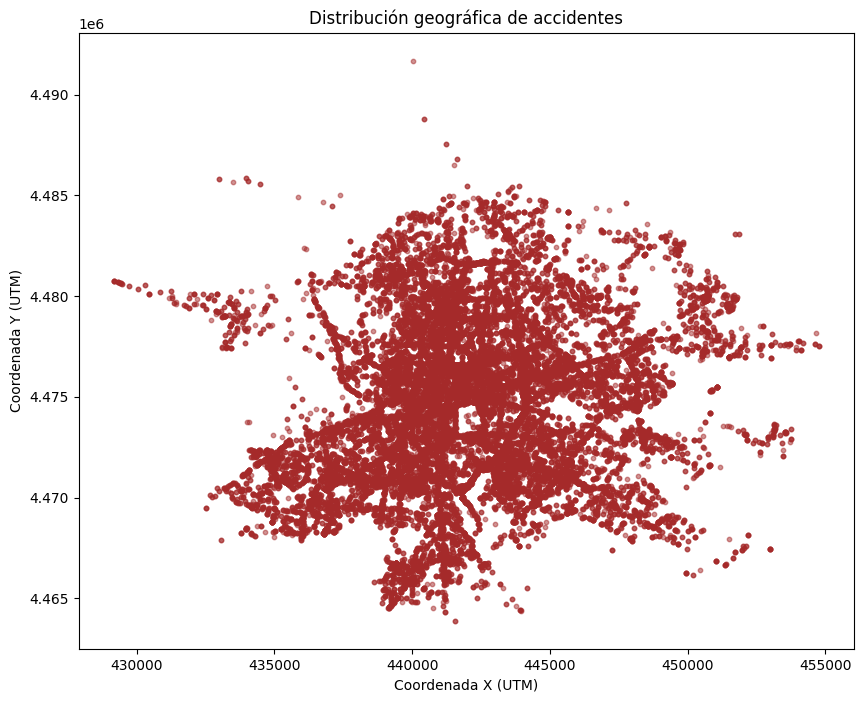

In [18]:
# Scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(df['coordenada_x_utm'], df['coordenada_y_utm'], alpha=0.5, s=10, color='brown')
plt.title('Distribución geográfica de accidentes')
plt.xlabel('Coordenada X (UTM)')
plt.ylabel('Coordenada Y (UTM)')
plt.show()


#### 1.1.2. Drugs

Column containg data about drug influence seems to be very important, especially when we are analysing the car accidents. However, it contains more than 99.5% of NaN values, so it does not give us any information. Inputing the data would make the column completely artificial. 

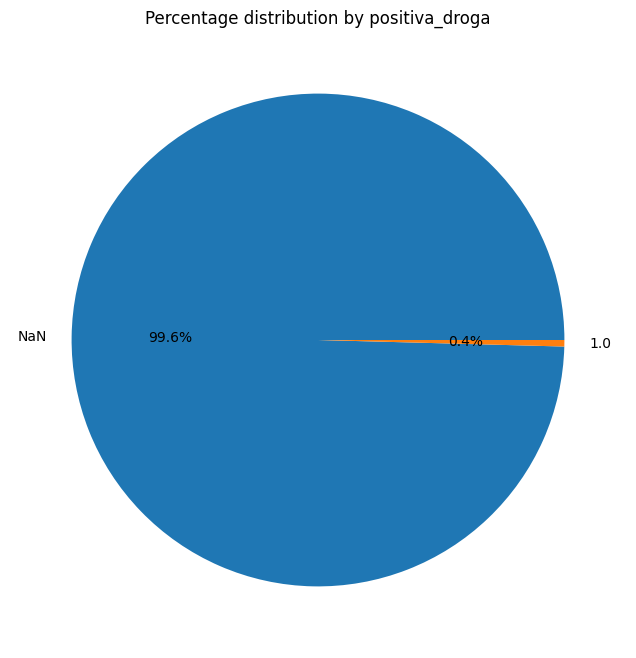

In [19]:
pie_categorical('positiva_droga')

In [20]:
df['positiva_droga'].value_counts()

positiva_droga
1.0    170
Name: count, dtype: int64

We can see that there are only 170 positive values in the column, whereas the others are NaNs.

We will drop the column for now, but in later analysis we will see if inputing the data will improve the results.

In [21]:
df.drop(columns=['positiva_droga'], inplace=True)

#### 1.1.3. Vehicle type

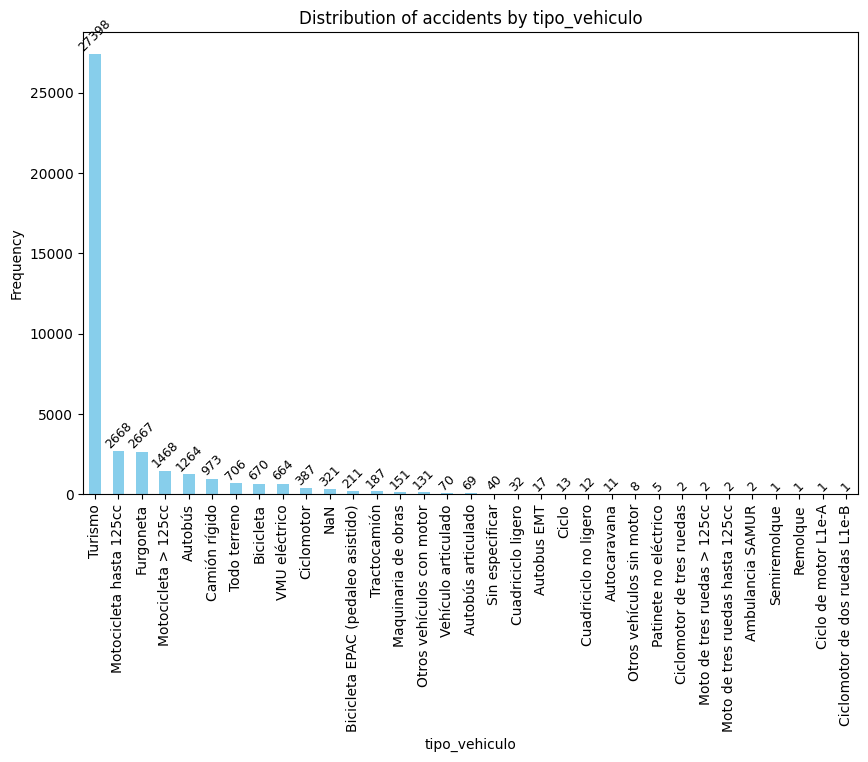

In [22]:
categorical_plot('tipo_vehiculo', 45)

In [23]:
# Sustituir Nans por 'Sin especificar' en tipo_vehiculo
df['tipo_vehiculo'] = df['tipo_vehiculo'].fillna('Sin especificar')

In [24]:
# Codificación de tipo de vehículo con Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['tipo_vehiculo'] = label_encoder.fit_transform(df['tipo_vehiculo'])


#### 1.1.4. Accident type 

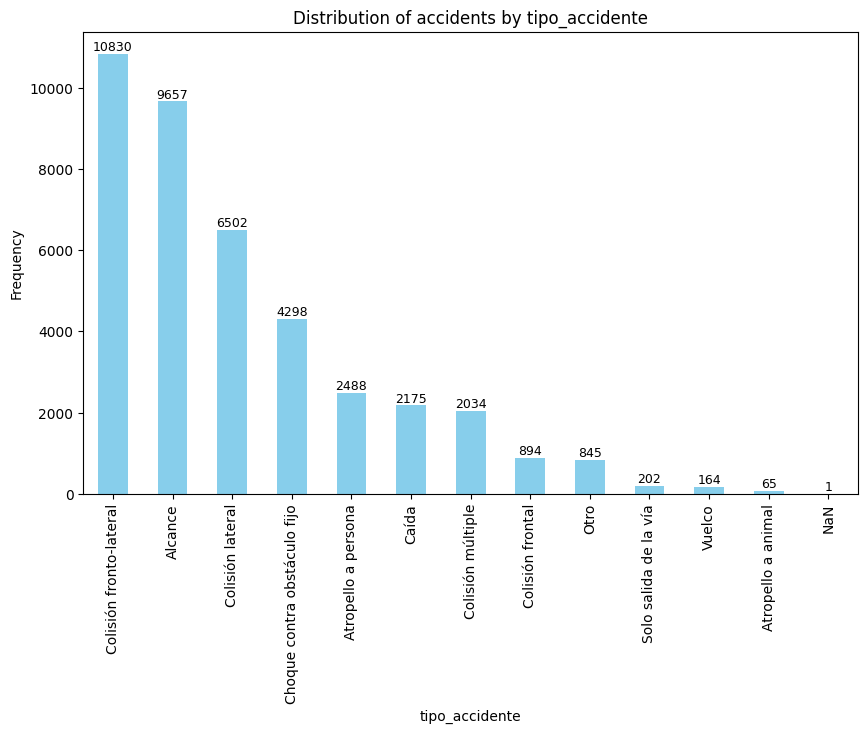

In [25]:
categorical_plot('tipo_accidente')

In [26]:
df[df['tipo_accidente'].isnull() == True]

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol
39957,2024S030163,30/10/2024,21:40:00,"CALL. RAIMUNDO FERNANDEZ VILLAVERDE, 47",47,6,TETUÁN,NaN,NaN,20,Conductor,Desconocido,Desconocido,NaN,NaN,440982.0,4477536.0,N


Como es solo una fila, comprobamos si existe otro implicado en el accidente para tratarlo y evitar perder información.

In [27]:
df[df['num_expediente'] == '2024S030163']

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol
39957,2024S030163,30/10/2024,21:40:00,"CALL. RAIMUNDO FERNANDEZ VILLAVERDE, 47",47,6,TETUÁN,NaN,NaN,20,Conductor,Desconocido,Desconocido,NaN,NaN,440982.0,4477536.0,N


Como tiene valores desconocidos en otras columnas, no aporta mucha información y decidimos eliminarlo

In [28]:
df = df[df['num_expediente'] != '2024S030163']

Por último, lo codificamos con Label Encoding

In [29]:
label_encoder = LabelEncoder()
df['tipo_accidente'] = label_encoder.fit_transform(df['tipo_accidente'])


#### 1.1.5. Alcohol

At frist, we will see how many missing values we have.

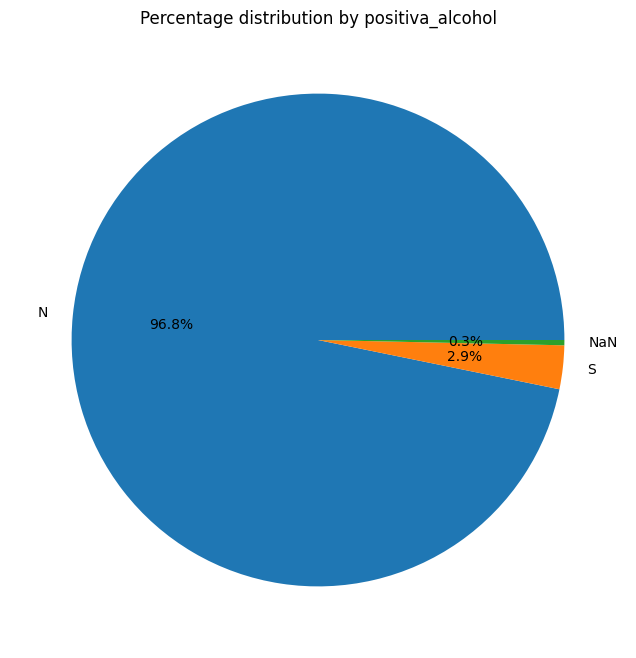

In [30]:
pie_categorical('positiva_alcohol')

In [31]:
len(df[df['positiva_alcohol'].isna() == True])

138

As we know in one accident there are more than just one car involved. We will check if the missing data belongs to only a few accidents or if each of them has a different *num_expediente* value. The latter will obviously make things more complicated.

In [32]:
len(df['num_expediente'][df['positiva_alcohol'].isna() == True].unique())

138

It looks, like there is as many accidents as missing values. We cannot reaaly drop those rows, because they are instances of different accident. If we delete the row containng data about one of the crushed cars, we are also loosing data for another participants of the accident.

We can check if the type of person is always a vehicle conductor. It could appear that the person is a child or a passanger. In this case the value of *positiva_alcohol* would not affect the data.

In [33]:
# print the rows where the person is not a driver and alhocol is nan
df[(df['tipo_persona'] != 'Conductor') & (df['positiva_alcohol'].isna() == True)]

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol


Unfortunatelly, it seems that the only people we are lacking information for are the drivers. That will not help us. 

After analysing the case, we decided to ytake a risk and have 138 rows with inputed data. That may results in bad classification, but we do not have other choice. As stated earlier, we cannot drop the rows, as they are a "part" of a whole another accident. 


**Decission:** Finally, we decided to treat empty values as False ('N'), meaning no influence of alcohol.

In [34]:
df['positiva_alcohol'].fillna('N', inplace=True)

C:\Users\eleni\AppData\Local\Temp\ipykernel_26988\2019537947.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['positiva_alcohol'].fillna('N', inplace=True)


Por último transformamos los valores de esta columna a 0 y 1 en vez de booleans ya que para determinados algoritmos es más fácil trabajar con valores numéricos.

In [35]:
df['positiva_alcohol'] = df['positiva_alcohol'].map({'S': 1, 'N': 0})

### 1.2. Redundant data

There are two pairs of columns that contain exactly the same information: *distrito* and *cod_distrito* and *lesividad* and *cod_lesividad*.

We decided to drop the columns containg names, as the others are already "encoded". However, first we will create dictionaries that will facilitate the interpretation of the data. We will also change the codes to numeric values, so that we can use them in later analysis.

#### 1.2.1. District

At first, we have to see if the codes align with the names.

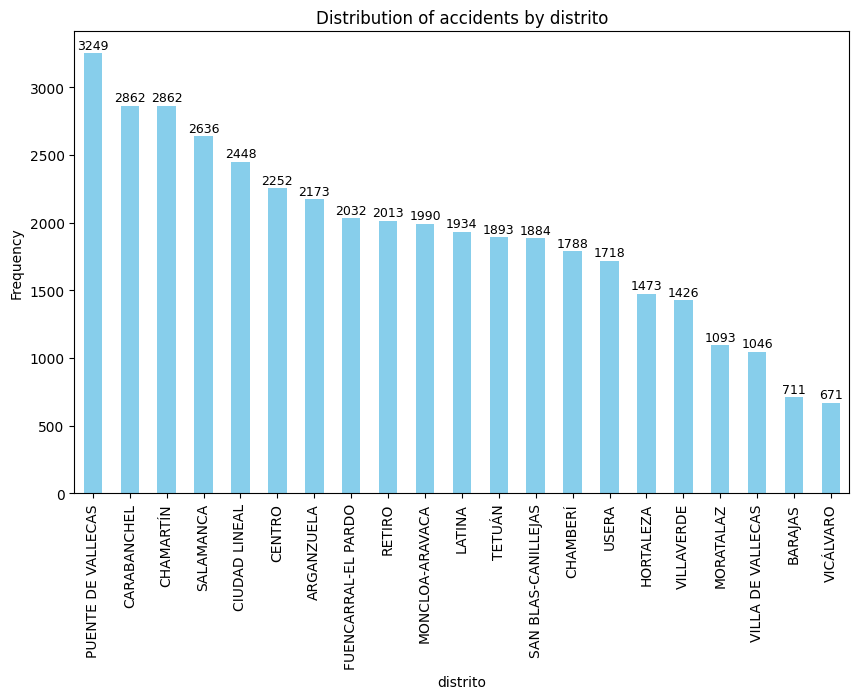

In [55]:
categorical_plot('distrito')

In [56]:
df['distrito'].value_counts()

distrito
PUENTE DE VALLECAS     3249
CARABANCHEL            2862
CHAMARTÍN              2862
SALAMANCA              2636
CIUDAD LINEAL          2448
CENTRO                 2252
ARGANZUELA             2173
FUENCARRAL-EL PARDO    2032
RETIRO                 2013
MONCLOA-ARAVACA        1990
LATINA                 1934
TETUÁN                 1893
SAN BLAS-CANILLEJAS    1884
CHAMBERÍ               1788
USERA                  1718
HORTALEZA              1473
VILLAVERDE             1426
MORATALAZ              1093
VILLA DE VALLECAS      1046
BARAJAS                 711
VICÁLVARO               671
Name: count, dtype: int64

In [57]:
df['cod_distrito'].value_counts()

cod_distrito
13    3249
11    2862
5     2862
4     2636
15    2448
1     2252
2     2173
8     2032
3     2013
9     1990
10    1934
6     1893
20    1884
7     1788
12    1718
16    1473
17    1426
14    1093
18    1046
21     711
19     671
Name: count, dtype: int64

We can see that the codes in the *cod_distrito* column are assigned taking into account the city zone, so the distance is preserved. 

Now, we create the dictionary contaning district names and codes.

In [58]:
district_keys = df['cod_distrito'].unique()    
district_names = df['distrito'].unique()

district_dict = dict(zip(district_keys, district_names))


In [59]:
district_dict

{np.int64(16): 'HORTALEZA',
 np.int64(1): 'CENTRO',
 np.int64(7): 'CHAMBERÍ',
 np.int64(6): 'TETUÁN',
 np.int64(10): 'LATINA',
 np.int64(9): 'MONCLOA-ARAVACA',
 np.int64(3): 'RETIRO',
 np.int64(13): 'PUENTE DE VALLECAS',
 np.int64(14): 'MORATALAZ',
 np.int64(11): 'CARABANCHEL',
 np.int64(4): 'SALAMANCA',
 np.int64(5): 'CHAMARTÍN',
 np.int64(19): 'VICÁLVARO',
 np.int64(2): 'ARGANZUELA',
 np.int64(8): 'FUENCARRAL-EL PARDO',
 np.int64(12): 'USERA',
 np.int64(18): 'VILLA DE VALLECAS',
 np.int64(21): 'BARAJAS',
 np.int64(17): 'VILLAVERDE',
 np.int64(20): 'SAN BLAS-CANILLEJAS',
 np.int64(15): 'CIUDAD LINEAL'}

Now, we drop the *distrito* column.

In [60]:
df.drop(['distrito'], axis=1, inplace=True)

#### 1.2.2. Lessivity

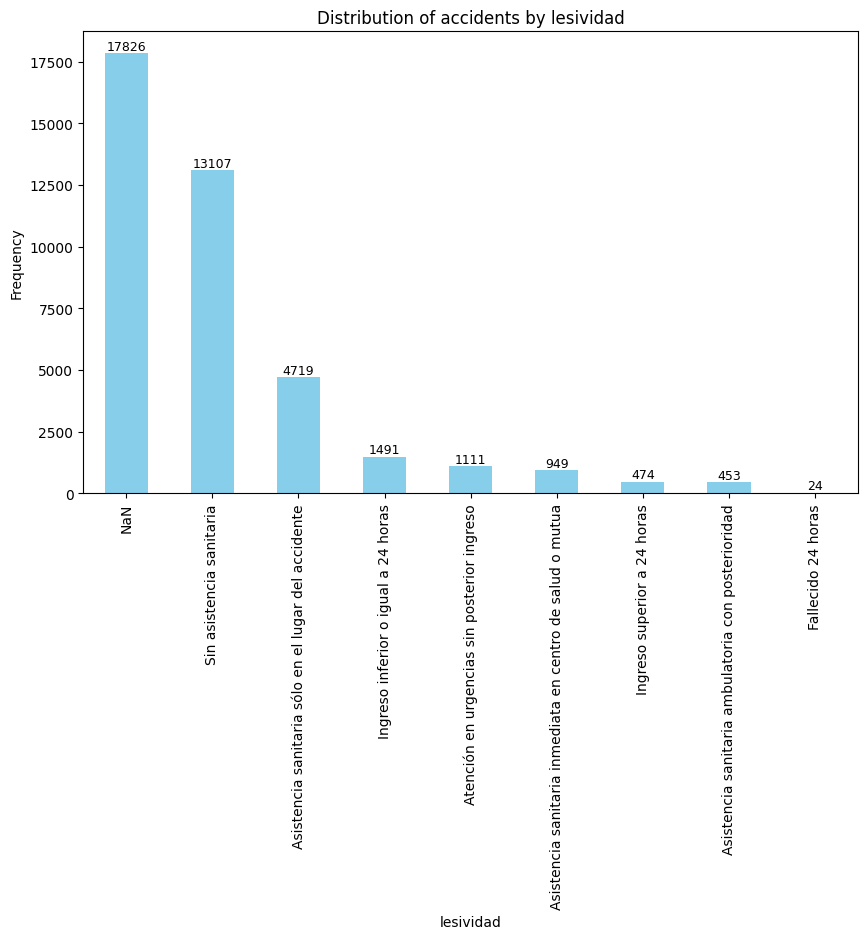

In [61]:
categorical_plot('lesividad')

We check, if the values align.

In [62]:
df['cod_lesividad'].value_counts()

cod_lesividad
14.0    13107
7.0      4719
2.0      1491
1.0      1111
6.0       949
3.0       474
5.0       453
4.0        24
Name: count, dtype: int64

In [63]:
df['lesividad'].value_counts()

lesividad
Sin asistencia sanitaria                                     13107
Asistencia sanitaria sólo en el lugar del accidente           4719
Ingreso inferior o igual a 24 horas                           1491
Atención en urgencias sin posterior ingreso                   1111
Asistencia sanitaria inmediata en centro de salud o mutua      949
Ingreso superior a 24 horas                                    474
Asistencia sanitaria ambulatoria con posterioridad             453
Fallecido 24 horas                                              24
Name: count, dtype: int64

In [64]:
df['lesividad'].unique(), df['cod_lesividad'].unique()

(array(['Ingreso inferior o igual a 24 horas', 'Sin asistencia sanitaria',
        'Asistencia sanitaria sólo en el lugar del accidente', nan,
        'Atención en urgencias sin posterior ingreso',
        'Ingreso superior a 24 horas',
        'Asistencia sanitaria inmediata en centro de salud o mutua',
        'Asistencia sanitaria ambulatoria con posterioridad',
        'Fallecido 24 horas'], dtype=object),
 array([ 2., 14.,  7., nan,  1.,  3.,  6.,  5.,  4.]))

As we know, those columns containg more than 40% of NaN values.

We could treat them as another category and encode them as well, naming it *'Desconocido'*. Inputing 40% of data uing other 60% does not really make sense. Nor does dropping almost half of the rows. So we decided to use encoding, as it is the most reasonbale option.

At first, we use *.fillna()* on those two columns, so that we can use the new values in our dictionary.

In [65]:
df['cod_lesividad'].fillna(0, inplace=True)
df['lesividad'].fillna('Sin especificar', inplace=True)

C:\Users\eleni\AppData\Local\Temp\ipykernel_26988\3214936209.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cod_lesividad'].fillna(0, inplace=True)
C:\Users\eleni\AppData\Local\Temp\ipykernel_26988\3214936209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [66]:
lesividad_keys = df['cod_lesividad'].unique()    
lesividad_names = df['lesividad'].unique()

lesividad_dict = dict(zip(lesividad_keys, lesividad_names))


We check the results.

In [67]:
lesividad_dict

{np.float64(2.0): 'Ingreso inferior o igual a 24 horas',
 np.float64(14.0): 'Sin asistencia sanitaria',
 np.float64(7.0): 'Asistencia sanitaria sólo en el lugar del accidente',
 np.float64(0.0): 'Sin especificar',
 np.float64(1.0): 'Atención en urgencias sin posterior ingreso',
 np.float64(3.0): 'Ingreso superior a 24 horas',
 np.float64(6.0): 'Asistencia sanitaria inmediata en centro de salud o mutua',
 np.float64(5.0): 'Asistencia sanitaria ambulatoria con posterioridad',
 np.float64(4.0): 'Fallecido 24 horas'}

Now, we can drop the *lesividad* column.

In [68]:
df.drop(['lesividad'], axis=1, inplace=True)

In [69]:
df.sample(5)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol
10769,2024S010013,20/03/2024,13:15:00,"CALL. TOLEDO, 71",71,1,2,Despejado,2,Peatón,De 40 a 44 años,Hombre,14.0,439867.0,4473607.0,0
27113,2024S022361,18/07/2024,10:20:00,CALL. EJE 7 / CTRA. VILLAVERDE A VALLECAS,1,18,6,Despejado,28,Conductor,De 45 a 49 años,Hombre,14.0,444404.0,4468644.0,0
27942,2024S022845,24/07/2024,5:30:00,AVDA. LEGAZPI MERCAMADRID / 44,10,18,7,Despejado,29,Conductor,Más de 74 años,Hombre,0.0,444060.0,4468161.0,0
19924,2024S018130,27/05/2024,15:30:00,CALL. MAESTRO ARBOS / AUTOV. M-30,29,2,7,Despejado,29,Conductor,De 21 a 24 años,Hombre,0.0,440977.0,4470984.0,0
32570,2024S025789,10/09/2024,16:02:00,AEROP. TERMINAL T-4 / T4 salidas dirección m12,0,21,8,Despejado,27,Conductor,De 50 a 54 años,Hombre,14.0,449164.0,4482957.0,0


In [70]:
df.shape

(40154, 16)

#### 1.2.3. Localizations

As stated earlier, *localizacion* and *numero* columns are redundant, so we will drop them directly.

In [71]:
df.drop(['localizacion', 'numero'], axis=1, inplace=True)

In [72]:
df.shape

(40154, 14)

## 1.3. Variable transformation

### 1.3.1. Date

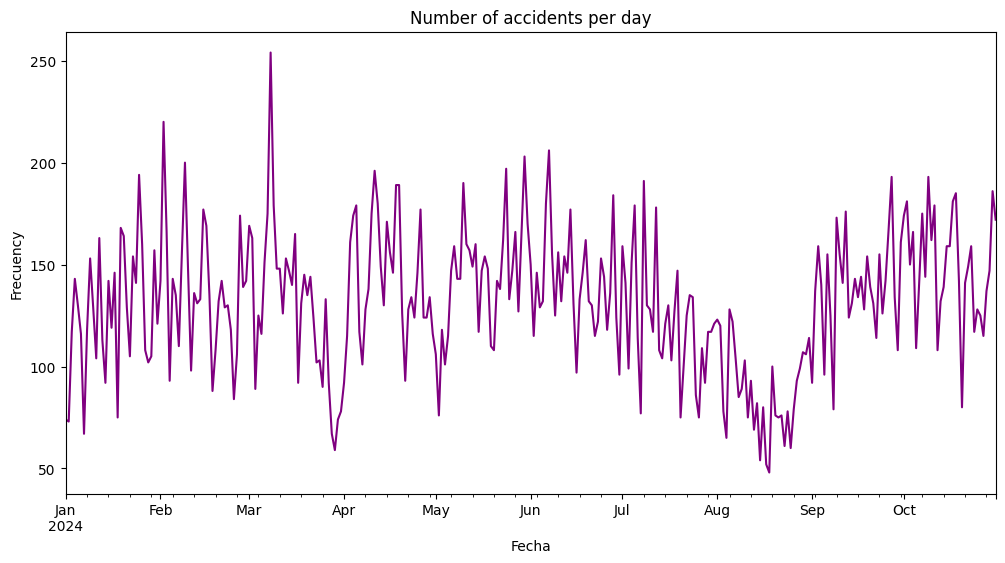

In [73]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%m/%Y')

df.groupby('fecha').size().plot(figsize=(12, 6), color='purple')
plt.title('Number of accidents per day')
plt.xlabel('Fecha')
plt.ylabel('Frecuency')
plt.show()


In [74]:
df['fecha'] = pd.to_datetime(df['fecha'], format='%d/%M/%Y', errors='coerce')
df['fecha_year'] = df['fecha'].dt.year
df['fecha_month'] = df['fecha'].dt.month
df['fecha_day'] = df['fecha'].dt.day
df.drop(columns=['fecha'], inplace=True)

### 1.3.2 Hora

In [75]:
# Clean and convert the 'hora' column to datetime format
df['hora'] = df['hora'].str.strip()  # Remove spaces
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S', errors='coerce')

df['hora_hour'] = df['hora'].dt.hour
df['hora_minute'] = df['hora'].dt.minute
df.drop(columns=['hora'], inplace=True)

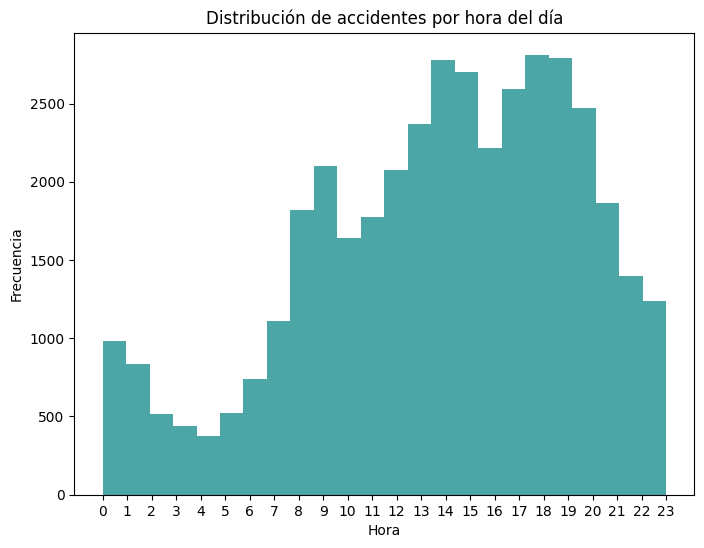

In [76]:
df['hora_hour'].plot(kind='hist', bins=24, color='teal', alpha=0.7, figsize=(8, 6))
plt.title('Distribución de accidentes por hora del día')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 24))
plt.show()

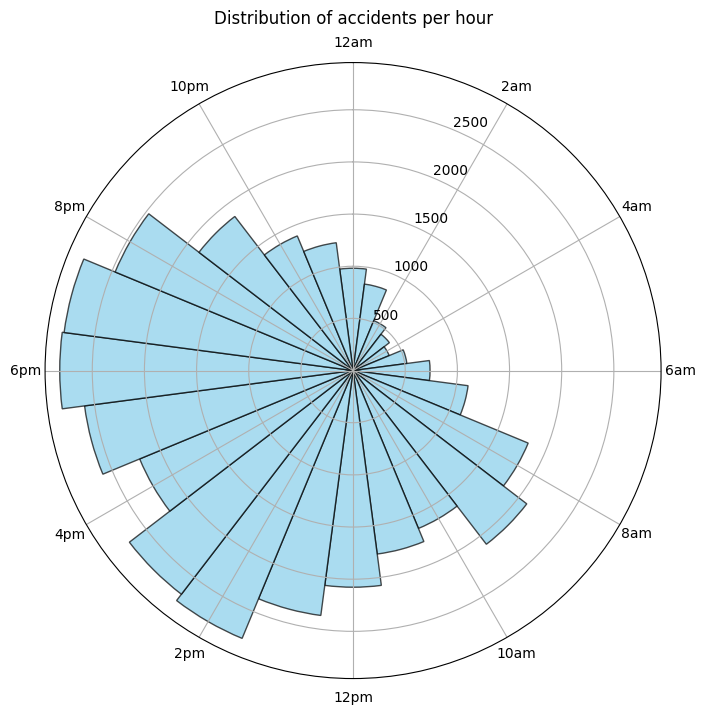

In [77]:

# Count the number of accidents per hour
accidents_per_hour = df['hora_hour'].value_counts().sort_index()

# Configure data for the polar plot
hours = accidents_per_hour.index
count = accidents_per_hour.values
angles = np.deg2rad(hours * 15)  # Convert hours to angles (360°/24h = 15° per hour)

# Create the polar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.bar(angles, count, width=np.deg2rad(15), color='skyblue', edgecolor='black', alpha=0.7)

# Visual adjustments
ax.set_theta_zero_location('N')  # Place 0 hours at the top
ax.set_theta_direction(-1)  # Hours clockwise
ax.set_xticks(np.deg2rad(np.arange(0, 360, 30)))  # Marks every 2 hours (30° = 2h)
ax.set_xticklabels(['12am', '2am', '4am', '6am', '8am', '10am', 
                    '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])

ax.set_title('Distribution of accidents per hour', va='bottom')
plt.show()

### 1.3.3 Sexo

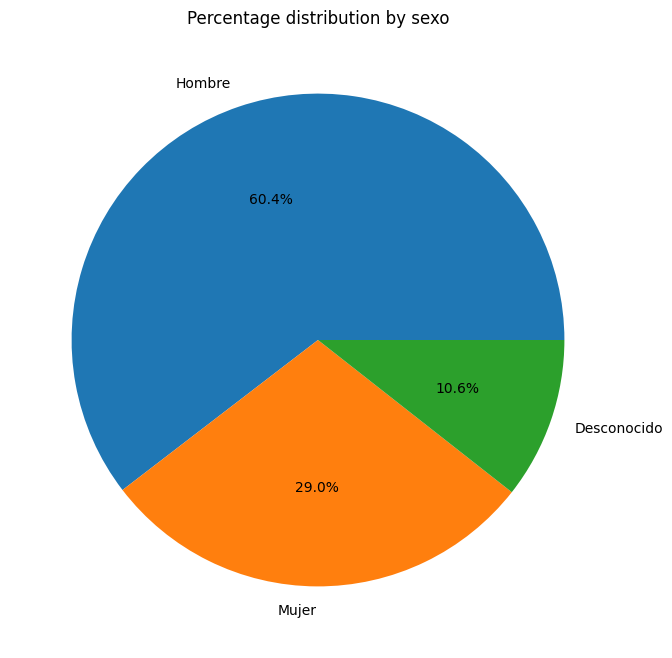

In [78]:
pie_categorical('sexo')

In [79]:
df['sexo'].value_counts()

sexo
Hombre         24260
Mujer          11640
Desconocido     4254
Name: count, dtype: int64

In [80]:
# codificamos la columna sexo con dumies
# H/M según columna y "False false" = desconocido
df = pd.get_dummies(df, columns=['sexo'], drop_first=True)

# Como hicimos con la columna alcohol, preferimos valores numéricos a booleanos
df['sexo_Hombre'] = df['sexo_Hombre'].map({True: 1, False: 0})
df['sexo_Mujer'] = df['sexo_Mujer'].map({True: 1, False: 0})


In [81]:
df.head()

,num_expediente,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_year,fecha_month,fecha_day,hora_hour,hora_minute,sexo_Hombre,sexo_Mujer
0,2023S040280,16,6,Lluvia débil,19,Conductor,De 55 a 59 años,2.0,444913.0,4481427.0,0,2024,1,4,14,9,1,0
1,2023S040280,16,6,Lluvia débil,29,Conductor,De 55 a 59 años,14.0,444913.0,4481427.0,0,2024,1,4,14,9,0,1
2,2023S040309,1,6,Lluvia débil,5,Conductor,De 25 a 29 años,7.0,440123.0,4475170.0,0,2024,2,15,14,5,1,0
3,2023S040309,1,6,Lluvia débil,20,Conductor,De 35 a 39 años,14.0,440123.0,4475170.0,0,2024,2,15,14,5,1,0
4,2023S040310,7,7,Despejado,29,Conductor,De 25 a 29 años,0.0,440137.0,4475721.0,0,2024,2,18,10,40,1,0


### 1.3.4 Rango edad

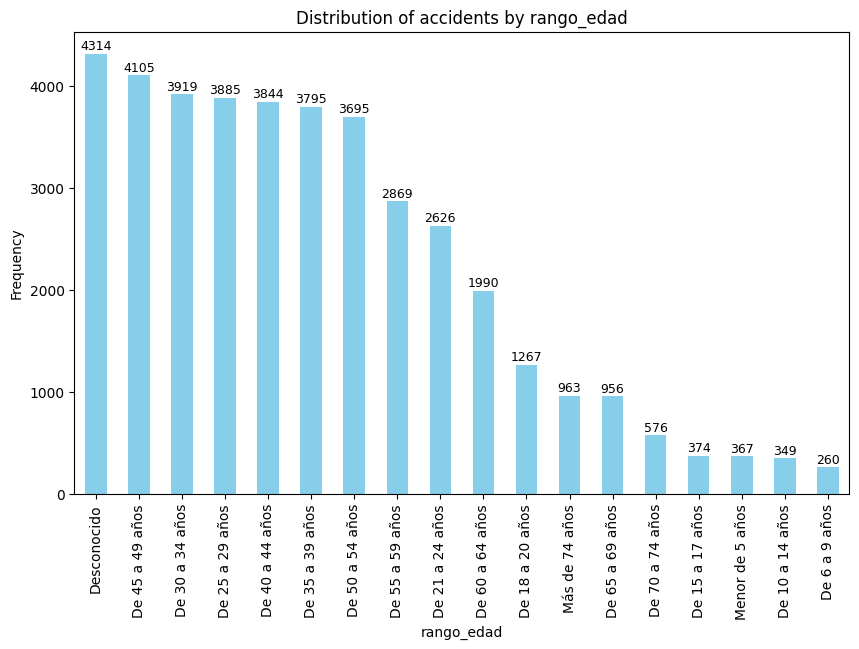

In [82]:
categorical_plot('rango_edad')

Hacemos el diccionario manualmente para hacerlo más comprensible y darle más sentido a las distancias entre los valores

In [83]:
frequency_map = {
    'Desconocido': 0,
    'Menor de 5 años': 1,
    'De 6 a 9 años': 2,
    'De 10 a 14 años': 3,
    'De 15 a 17 años': 4,
    'De 18 a 20 años':5,
    'De 21 a 24 años': 6,
    'De 25 a 29 años': 7,
    'De 30 a 34 años': 8,
    'De 35 a 39 años': 9,
    'De 40 a 44 años': 10,
    'De 45 a 49 años': 11,
    'De 50 a 54 años': 12,
    'De 55 a 59 años': 13,
    'De 60 a 64 años': 14,
    'De 65 a 69 años': 15,
    'De 70 a 74 años': 16,
    'Más de 74 años': 17,

}
# Ahora reemplazamos los valores
df['rango_edad'] = df['rango_edad'].map(frequency_map)

### 1.3.5 Tipo de persona

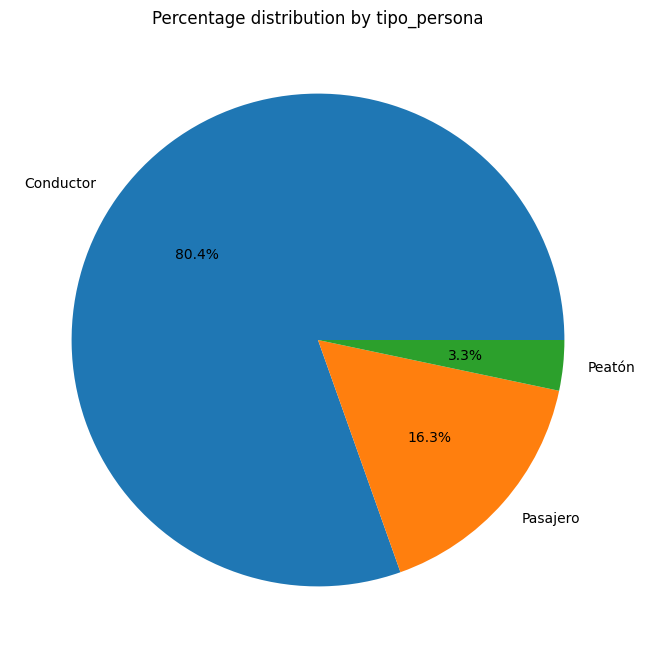

In [84]:
pie_categorical('tipo_persona')

In [85]:
# label encoding tipo persona
label_encoder = LabelEncoder()
df['tipo_persona'] = label_encoder.fit_transform(df['tipo_persona'])


### 1.3.6 Estado meteorológico > ESTOY TRABAJANDO EN ESTO :)

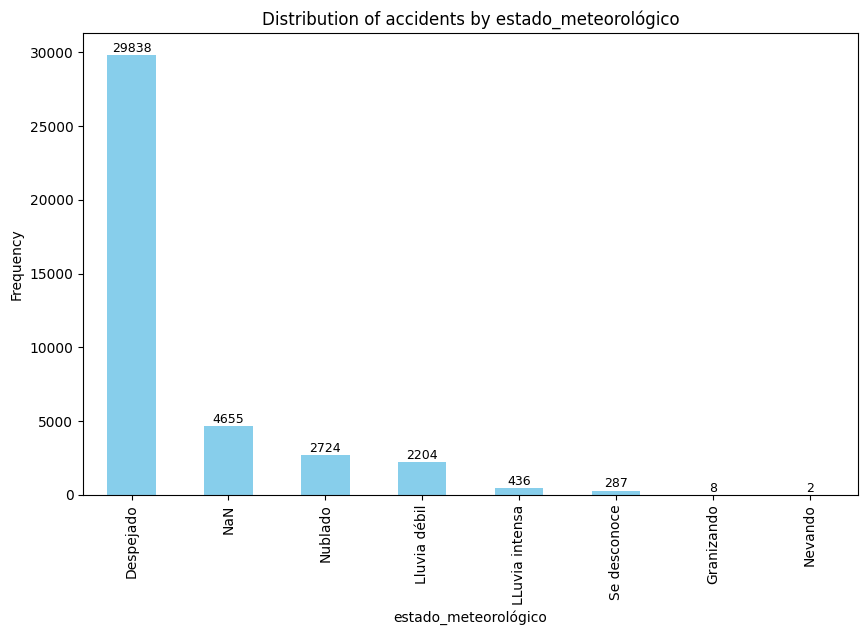

In [ ]:
categorical_plot('estado_meteorológico')


Tenemos valores NaN pero también tenemos una columna de "Se desconoce", esto implica que directamente se puede imputar esta categoria

Tenemos varias opciones:
1. Comprobar si hay alguna fila con el mismo expediente que tenga un valor en la columna y, en ese caso, imputar el valor a todas las filas con el mismo expediente
2. Hacer un análisis de la fecha y la hora para imputar el valor más probable
3. Imputar el valor "Se desconoce" a todas las filas con NaN

In [ ]:
import pandas as pd

def contar_expedientes_con_valores_disponibles(df):
    # Crear una copia del DataFrame para no modificar el original
    df_copy = df.copy()
    
    # Filtrar los expedientes con al menos una fila nula
    expedientes_con_nan = df_copy[df_copy['estado_meteorológico'].isna()]['num_expediente'].unique()
    
    # Contador de expedientes que cumplen la condición
    contador = 0
    
    for num_exp in expedientes_con_nan:
        # Filtrar filas del mismo expediente
        grupo = df_copy[df_copy['num_expediente'] == num_exp]
        
        # Verificar si hay valores no nulos y diferentes de 'Se desconoce'
        if grupo['estado_meteorológico'].notna().any() and (grupo['estado_meteorológico'] != 'Se desconoce').any():
            contador += 1
    
    return contador
print(contar_expedientes_con_valores_disponibles(df))

0


Como no hay ninguna fila con el mismo expediente que tenga un valor en la columna, no podemos imputar el valor de esta forma.

Vamos a probar con la segunda opción para ser más precisos con los resultados. Para esto tendremos en cuenta el estado meteorológico de otros accidentes el mismo día, a la misma hora y en una zona cercana.
- El requisito para ser una zona cercana es por distancias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def imputar_por_distancia(df, umbral_distancia=1000, umbral_tiempo=30):
    cont_exito = 0
    cont_fracaso = 0
    # Filtrar filas con valores nulos
    filas_nan = df[df['estado_meteorológico'].isna()]
    filas_no_nan = df[(df['estado_meteorológico'].notna()) & (df['estado_meteorológico'] != 'Se desconoce')]
   
    # Convertir tiempo a minutos absolutos
    df['minutos_totales'] = df['hora_hour'] * 60 + df['hora_minute']
    
    for idx, fila in filas_nan.iterrows():
        # Filtrar filas candidatas basadas en el día del mismo año y del mismo mes
        candidatos = filas_no_nan[filas_no_nan['fecha_year'] == fila['fecha_year']]
        candidatos = candidatos[candidatos['fecha_month'] == fila['fecha_month']]
        candidatos = candidatos[candidatos['fecha_day'] == fila['fecha_day']]
        
        # Calcular distancias geográficas
        distancias = np.sqrt(
            (candidatos['coordenada_x_utm'] - fila['coordenada_x_utm'])**2 +
            (candidatos['coordenada_y_utm'] - fila['coordenada_y_utm'])**2
        )

        # Filtrar por distancia
        candidatos = candidatos[distancias <= umbral_distancia]
        
        # Calcular diferencia en tiempo y filtrar a valores dentro del umbral (30 mins)
        diferencia_tiempo = abs(candidatos['minutos_totales'] - fila['minutos_totales'])
        candidatos = candidatos[diferencia_tiempo <= umbral_tiempo]
        
        # Imputar valor si hay candidatos válidos
        if not candidatos.empty:
            valor_imputado = candidatos['estado_meteorológico'].mode()[0]
            df.at[idx, 'estado_meteorológico'] = valor_imputado
            print(f'Imputado valor {valor_imputado} en fila {idx}')
            cont_exito += 1
        else:
            # imputar 'Se desconoce' si no hay candidatos
            df.at[idx, 'estado_meteorológico'] = 'Se desconoce'
            print(f'"Se desconoce" fila {idx}')
            cont_fracaso += 1
    
    print(f'Imputados: {cont_exito}, No imputados: {cont_fracaso}')
    # Eliminar la columna temporal
    df.drop(columns=['minutos_totales'], inplace=True)

    return df


imputar_por_distancia(df)


"Se desconoce" fila 26019
"Se desconoce" fila 26030
"Se desconoce" fila 26031
Imputado valor Despejado en fila 26032
Imputado valor Despejado en fila 26033
Imputado valor Despejado en fila 26034
"Se desconoce" fila 26037
"Se desconoce" fila 26038
"Se desconoce" fila 26042
"Se desconoce" fila 26043
"Se desconoce" fila 26044
"Se desconoce" fila 26050
"Se desconoce" fila 26051
"Se desconoce" fila 26052
"Se desconoce" fila 26053
"Se desconoce" fila 26054
"Se desconoce" fila 26055
"Se desconoce" fila 26056
"Se desconoce" fila 26057
"Se desconoce" fila 26077
"Se desconoce" fila 26078
"Se desconoce" fila 26079
Imputado valor Despejado en fila 26094
Imputado valor Despejado en fila 26095
Imputado valor Despejado en fila 26096
"Se desconoce" fila 26103
"Se desconoce" fila 26133
"Se desconoce" fila 26134
"Se desconoce" fila 26135
"Se desconoce" fila 26162
"Se desconoce" fila 26163
"Se desconoce" fila 26170
"Se desconoce" fila 26171
"Se desconoce" fila 26187
"Se desconoce" fila 26188
"Se desconoc

,num_expediente,cod_distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,cod_lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,fecha_year,fecha_month,fecha_day,hora_hour,hora_minute,sexo_Hombre,sexo_Mujer
0,2023S040280,16,6,Lluvia débil,19,0,13,2.0,444913.0,4481427.0,0,2024,1,4,14,9,1,0
1,2023S040280,16,6,Lluvia débil,29,0,13,14.0,444913.0,4481427.0,0,2024,1,4,14,9,0,1
2,2023S040309,1,6,Lluvia débil,5,0,7,7.0,440123.0,4475170.0,0,2024,2,15,14,5,1,0
3,2023S040309,1,6,Lluvia débil,20,0,9,14.0,440123.0,4475170.0,0,2024,2,15,14,5,1,0
4,2023S040310,7,7,Despejado,29,0,7,0.0,440137.0,4475721.0,0,2024,2,18,10,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40160,2024S030621,5,7,Se desconoce,29,0,11,14.0,441447.0,4478230.0,0,2024,10,18,17,5,1,0
40161,2024S031786,9,0,Se desconoce,29,0,0,0.0,439269.0,4475805.0,0,2024,10,11,2,0,0,0
40162,2024S031786,9,0,Se desconoce,29,0,0,0.0,439269.0,4475805.0,0,2024,10,11,2,0,1,0
40163,2024S031786,9,0,Se desconoce,29,1,6,14.0,439269.0,4475805.0,0,2024,10,11,2,0,1,0


## 1.4. Revisión final datos

In [ ]:
df.dtypes

num_expediente           object
cod_distrito              int64
tipo_accidente            int64
estado_meteorológico     object
tipo_vehiculo             int64
tipo_persona              int64
rango_edad                int64
cod_lesividad           float64
coordenada_x_utm        float64
coordenada_y_utm        float64
positiva_alcohol          int64
fecha_year                int32
fecha_month               int32
fecha_day                 int32
hora_hour                 int32
hora_minute               int32
sexo_Hombre               int64
sexo_Mujer                int64
dtype: object

En este punto, nos encontramos con el problema de que existen más de una fila para un mismo expediente y por ello debemos de analizar las posibles soluciones:
1. Mantener toddas las filas: 
    - Nos puede servir cuando queremos  identificar patrones a nivel individual (persona), como el perfil de las personas involucradas en accidentes.
    - **Desventaja:** Los accidentes con más personas involucradas no se analizan en conjunto, lo que puede sesgar los resultados del clustering. 
2. Agrupar las filas por expediente:
    - Nos puede servir para analizar los accidentes en conjunto y no individualmente.
    - **Desventaja:** Las columnas resultantes de la fusión puede no reflejar la realidad de los datos originales ya que nosotros la creamos en base a una regla que nosotros definimos.
3. Generar dos datasets para análisis individual y conjunto
<br><br> **Decisión:** Como el objetivo es caracterizar accidentes según la ubicación, condiciones meteorológicas, tipo de accidente, etc., decidimos agrupar las filas por expediente.


Vamos a ver qué columnas se mantienen constantes para un mismo expediente y cuáles no.

In [ ]:
import pandas as pd

def check_column_consistency(df, group_column):
    consistency = {}
    grouped = df.groupby(group_column)
    
    for col in df.columns:
        if col == group_column:
            continue
        
        # Verificamos si todos los valores en cada grupo son iguales
        consistent = grouped[col].nunique().eq(1).all()
        consistency[col] = consistent
    
    # Convertimos el diccionario en un DataFrame para visualizar
    consistency_df = pd.DataFrame(list(consistency.items()), columns=['Column', 'Is_Consistent'])
    
    return consistency_df

result = check_column_consistency(df, group_column='num_expediente')
print(result)


                  Column  Is_Consistent
0           cod_distrito           True
1         tipo_accidente           True
2   estado_meteorológico          False
3          tipo_vehiculo          False
4           tipo_persona          False
5             rango_edad          False
6          cod_lesividad          False
7       coordenada_x_utm           True
8       coordenada_y_utm           True
9       positiva_alcohol          False
10            fecha_year           True
11           fecha_month           True
12             fecha_day           True
13             hora_hour           True
14           hora_minute           True
15           sexo_Hombre          False
16            sexo_Mujer          False


- Coinciden cod_distrito, coordenadas, fecha, hora, estado_meteo, tipo_accidente, y localizacion.

- No coinciden: tipo_persona, sexo, rango_edad, lesividad, vehiculo, positivo_alcohol, positivo_drogas

<br><br> Planteamos dos posibles soluciones para la fusión de datos que no coinciden:
- **Solución 1:** Agrupar los valores inconsistentes como listas o cadenas separadas por comas.
- **Solución 2:** Realizar operaciones de agregación (media de edades, lesión maxima/media...)
<br><br>NOTA 1 : Ambas soluciones requieren de la creación de una columna extra de *num_personas_involucradas*
<br><br>NOTA 2 : Hay que tener en cuenta que hay modelos de clustering que no son capaces de trabajar con listas. Solo HDBScan y K-modes lo permiten
<br><br>NOTA 3 : El enunciado exige que se mantenga tipo de vehículo!!!

#### Esto en standby porque todavía no hemos hecho la codificación de estado meteorológico

In [ ]:
import pandas as pd

def find_differing_weather(df):
    # Agrupar por num_expediente y obtener los grupos donde los valores de estado_meteorológico son distintos
    grouped = df.groupby('num_expediente')['estado_meteorológico']
    
    differing_rows = {}
    for name, group in grouped:
        if group.nunique() > 1:  # Hay más de un valor en este grupo, lo que indica diferencia
            differing_rows[name] = group.tolist()
    
    return differing_rows

# Aplicación
differing_weather = find_differing_weather(df)

# Muestra los resultados
for exp, values in differing_weather.items():
    print(f"Expediente {exp}: {values}")

find_differing_weather(df)

{}

## otro

We want to check if every ID (*num_expediente* column) corresponds to only one row.

In [ ]:
len(df['num_expediente'].unique())

16929

It is obviously false, as there are usually one there more vehicule/person involved in the accident.

# Tarea 2.1: 
Aplica al menos 2 algoritmos de clustering jerárquico sobre el dataset
proporcionado, probando y evaluando los efectos de la distancia utilizada (euclídea,
coseno…). 